In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy.stats import f_oneway
from scipy.stats import f

## Gathering data

In [ ]:
# gathering data dengan mengimpor excel
df = pd.read_excel('marketing_campaign.xlsx')

In [ ]:
# mendisplay DataFrame
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Content
Attributes

People

ID: Customer's unique identifier <br>
Year_Birth: Customer's birth year <br>
Education: Customer's education level <br>
Marital_Status: Customer's marital status <br>
Income: Customer's yearly household income <br>
Kidhome: Number of children in customer's household <br>
Teenhome: Number of teenagers in customer's household <br>
Dt_Customer: Date of customer's enrollment with the company <br>
Recency: Number of days since customer's last purchase <br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise <br>

## Assesing and cleaning data

In [ ]:
# menampilkan summary data, ternyata terdapat missing value pada kolom Income
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
# mengecek apakah terdapat data yang duplikat,setelah dicek tidak ada data duplikat
df.duplicated().sum()

0

Pada kolom Income terdapat 24 missing value yaitu sebanyak 1% dari jumlah data, saya mengasumsikan bahwa data tersebut sesuai kondisi yang sebenarnya yaitu 24 pemilik data tersebut tidak memiliki penghasilan, sehingga saya memilih untuk menghapus data missing value.

In [ ]:
#mengecek berapa persen missing value
24/2240

0.010714285714285714

In [ ]:
# mengecek missing value pada kolom Income, dan ditemukan 24 data data yang miss (NaN)
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
# menghapus missing value pada kolom Income
df.dropna(subset=['Income'], inplace=True)

In [ ]:
# mengecek apakah data missing value sudah terhapus, jumlah data sekarang menjadi 2216
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

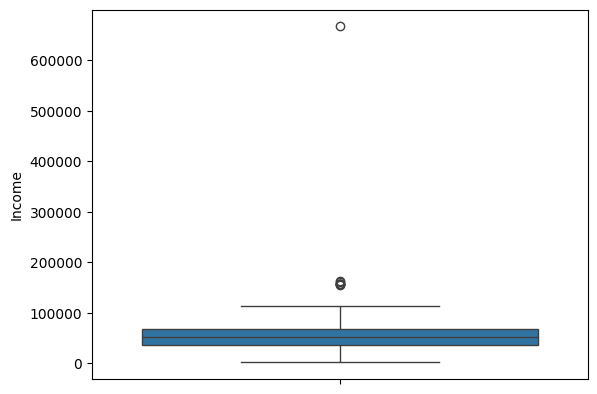

In [ ]:
# mengecek apakah terdapat outlier pada data Income, dan terlihat pada boxplot yang ditampilkan bahwa terdapat outlier pada data Income
sns.boxplot(data=df['Income'])
plt.show()

In [ ]:
# membuat function untuk melihat nilai outlier
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
    else 'not-outlier' for x in data[column].values]

In [ ]:
# melihat outlier pada kolom Income
df['outlier_income'] = check_outlier(data=df, column='Income')

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,outlier_income
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,not-outlier
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,not-outlier
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,not-outlier
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,not-outlier
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,not-outlier
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,not-outlier
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,not-outlier
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,not-outlier


In [ ]:
# memfilter outlier pada kolom outlier_income
df[df['outlier_income'] == 'outlier']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,outlier_income
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,3,11,0,outlier
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,0,0,3,11,0,outlier
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,3,11,0,outlier
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,3,11,0,outlier
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,0,0,3,11,0,outlier
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,0,0,3,11,0,outlier
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,3,11,0,outlier
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,0,3,11,0,outlier


Terdapat 8 outlier pada kolom Income, untuk mengatasi nilai outlier saya memilih untuk membuat DataFrame baru tanpa nilai outlier, dan melakukan hipotesis tanpa nilai outlier. saya berasumsi bahwa outlier tersebut menggambarkan kondisi yang sebenarnya yaitu penghasilan pemilik data tersebut memang jauh diatas rata-rata. sehingga jika ingin dilakukan analisa, maka dilakukan secara terpisah

In [ ]:
# membuat DataFrame baru tanpa baris yang mengandung outlier
without_outlier = df['outlier_income'] == 'not-outlier'
new_df = df[without_outlier]

# menampilkan DataFrame baru, jumlah baris data menjadi 2208
new_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,outlier_income
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,not-outlier
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,not-outlier
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,not-outlier
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,not-outlier
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,not-outlier
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,not-outlier
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,not-outlier
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,not-outlier


## Analisis Deskriptif Statistik

In [ ]:
new_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208,2208.000000,2208.000000,2208.000000,2208.000000,...,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.0,2208.0,2208.000000
mean,5586.900815,1968.807065,51633.638134,0.442029,0.506341,2013-07-10 11:49:33.913043456,49.014040,306.100996,26.435236,165.347826,...,5.334239,0.073822,0.074275,0.073370,0.064312,0.013587,0.009511,3.0,11.0,0.150815
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35196.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51301.000000,0.000000,0.000000,2013-07-09 00:00:00,49.000000,177.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8418.500000,1977.000000,68289.750000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,507.000000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.110303,11.991913,20713.376530,0.537063,0.544325,NaN,28.938638,337.516270,39.842478,217.852649,...,2.413837,0.261541,0.262278,0.260801,0.245363,0.115795,0.097081,0.0,0.0,0.357950


# Measure of Central Tendency

In [ ]:
# melihat ukuran pemusatan
income_mean = new_df['Income'].mean()
income_median = new_df['Income'].median()
education_mode = new_df['Education'].mode()[0]

In [ ]:
# menampilkan ukuran pemusatan
print('Mean:',income_mean)
print('Median:',income_median)
print('Mode:',education_mode)

Mean: 51633.63813405797
Median: 51301.0
Mode: Graduation


In [ ]:
# melihat ukuran pemusatan

q1 = new_df['Income'].quantile(0.25)
q3 = new_df['Income'].quantile(0.75)
# Perentile
p99 = new_df['Income'].quantile(0.99)

print('q1:',q1)
print('q3:',q3)
print ('p99:',p99)

q1: 35196.0
q3: 68289.75
p99: 92837.78999999995


In [ ]:
# melihat nilai minimum, maksimum dan rentang
income_min = new_df['Income'].min()
income_max = new_df['Income'].max()

print('Minimum:',income_min )
print('Maximum:',income_max)
print('Rentang:',income_max-income_min)

Minimum: 1730.0
Maximum: 113734.0
Rentang: 112004.0


# Measure of Spread

In [ ]:
# melihat variansi dan standar deviasi

income_var = new_df['Income'].var()
income_std = new_df['Income'].std()

print('Variance:',income_var)
print('Standard Deviation:',income_std)

Variance: 429043967.2641002
Standard Deviation: 20713.376529771773


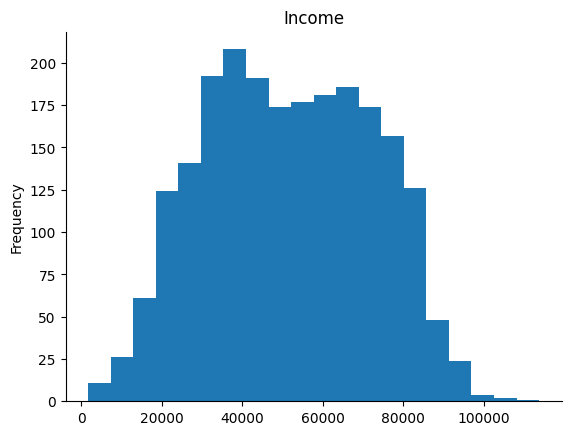

In [ ]:
# melihat distribusi data dalam kolom Income

new_df['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Manipulation

In [ ]:
# melihat ada kategori apa saja berapa jumlahnya dalam kolom Education
new_df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
# memfilter data dalam kolom Education sesuai kategori, lalu melakukan sampling sebanyak 54 data, kemudian memasukkan data tersebut ke dalam list

graduation = []
phd = []
master = []
basic = []
second_cycle = []

stratify_cols = ['Education', 'Income']

graduation_df = new_df[new_df['Education']=='Graduation']
graduation_sampled_df = resample(graduation_df, n_samples=54, stratify=graduation_df[stratify_cols])
graduation.extend(graduation_sampled_df['Income'].tolist())

phd_df = new_df[new_df['Education']=='PhD']
phd_sampled_df = resample(phd_df, n_samples=54, stratify=phd_df[stratify_cols])
phd.extend(phd_sampled_df['Income'].tolist())

master_df = new_df[new_df['Education']=='Master']
master_sampled_df = resample(master_df, n_samples=54, stratify=master_df[stratify_cols])
master.extend(master_sampled_df['Income'].tolist())

basic_df = new_df[new_df['Education']=='Basic']
basic_sampled_df = resample(basic_df, n_samples=54, stratify=basic_df[stratify_cols])
basic.extend(basic_sampled_df['Income'].tolist())

second_cycle_df = new_df[new_df['Education']=='2n Cycle']
second_cycle_sampled_df = resample(second_cycle_df, n_samples=54, stratify=second_cycle_df[stratify_cols])
second_cycle.extend(second_cycle_sampled_df['Income'].tolist())

In [ ]:
print(len(graduation_df))
print(len(phd_df))
print(len(master_df))
print(len(basic_df))
print(len(second_cycle_df))

1113
477
364
54
200


karena data paling sedikit berjumlah 54, yaitu pada kelompok basic Education, maka saya menggunakan sampling sebanyak 54 pada setiap kelompok, kemudian data sampling tersebut yang akan saya gunakan pada hipotesis ANOVA. Jika jumlah sampel tidak sama, kekuatan statistik untuk mendeteksi perbedaan antara kelompok mungkin berkurang. dan untuk meningkatkan keandalan hasil maka saya memutuskan untuk menggunakan jumlah data yang sama pada tiap kelompok.

# HIPOTESIS
ANOVA <br>
Tujuan : Membandingkan rata-rata lima kelompok Education

Pengujian Hipotesis : <br>
H0 : Tidak ada perbedaan antara customer's education level (graduation, phd, master, basic, 2n cycle) <br>
H1 : Ada perbedaan antara customer's education level (graduation, phd, master, basic, 2n cycle) <br>

Signifikan atau tidak signifikan

In [ ]:
# ANOVA
f_stat, p_value = f_oneway(graduation, phd, master, basic, second_cycle)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

#keputusan
alpha = 0.05
if p_value <= alpha:
    print("Tolak H0")
else:
    print("Gagal menolak H0")

F-Statistic: 30.396239904517156, P-Value: 7.948244998722563e-21
Tolak H0


In [ ]:
num = 7.948244998722563e-21
print("{:.20f}".format(num))

0.00000000000000000001


In [ ]:
# mengecek nilai f kritis
dfn = 5  # derajat kebebasan pembilang (Jumlah kelompok yang dibandingkan)
dfd = 54 # derajat kebebasan penyebut (Jumlah Sampel atau data yang digunakan)

# Hitung nilai F kritis
f_tabel = f.ppf(1 - alpha, dfn, dfd)
print(f"Nilai F kritis pada alpha={alpha} dengan dfn={dfn} dan dfd={dfd} adalah {f_tabel}")

Nilai F kritis pada alpha=0.05 dengan dfn=5 dan dfd=54 adalah 2.3860698615742164


Interpretasi Hasil : <br>

p-value (0.00000000000000000001) <= alpha (0.05) <br>
nilai p-value lebih kecil dari alpha sehingga kita menolak H0 dan menerima H1, artinya ada perbedaan rata-rata antara customer's education level. <br>

F-statistic (30.396239904517156) > F-tabel (2.3860698615742164) <br>
nilai F-statistic lebih besar dari F-tabel berarti signifikan.

sehingga dapat diambil sebuah kesimpulan bahwa terdapat pengaruh signifikan antara tingkat pendidikan (education) dan penghasilan (income).

